In [2]:
#1. import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#2. bring MNIST dataset
mnist = fetch_openml("mnist_784",parser='auto')

In [4]:
#3. change data type pandas Dataframe to numpy arrays
X, y = mnist.data.values, mnist.target.values

In [5]:
X.shape

(70000, 784)

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
y

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
### check pixel value
unique_values = np.unique(X)

min_pixel_value = np.min(unique_values)
max_pixel_value = np.max(unique_values)

min_pixel_value, max_pixel_value

(0, 255)

In [9]:
#4. binarize
X_binary = (X > 128).astype(int)

In [10]:
#5. import test, train data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=127)


In [11]:
#6. make a Bernoulli-Naive-Base Model Class
class BernoulliNBWithLog:
    def fit(self, X, y):
        self.classes = np.unique(y)
        ## prior probability
        # Calculate and store the log of class priors - the likelihood of each class occurring
        self.class_priors = np.array([np.log(np.mean(y == c)) for c in self.classes])
        
        ## conditional probability
        # calculate the likelihood of a set of features (the feature vector) given a class
        self.feature_probs = []
        for c in self.classes:
            feature_prob = (X[y == c].sum(axis=0)) / (np.sum(y == c))
            # to avoid extreme value, set the scope using clip function
            self.feature_probs.append(np.log(np.clip(feature_prob, 1e-10, 1.0 - 1e-10)))
        self.feature_probs = np.array(self.feature_probs)

    def predict(self, X):
        ## posterior probability
        # calculate matrix dot prodcut to relfect relation between class and features
        log_likelihoods = np.dot(X, self.feature_probs.T)
        log_posteriors = log_likelihoods + self.class_priors
        predicted_class = self.classes[np.argmax(log_posteriors, axis=1)]
            # 2D NumPy array : axis=0 > vertical axis (columns) /  axis=1 > horizontal axis (rows).
        return predicted_class

In [12]:
#7. Initialize and train the model
model = BernoulliNBWithLog()
model.fit(X_train, y_train)

In [13]:
#8. Evaluate the model using the test data
y_pred = model.predict(X_test)

In [14]:
#9. calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.5f}%".format(accuracy * 100))
        # {:.5f} : floating-point number with three decimal places.

Accuracy: 70.77857%


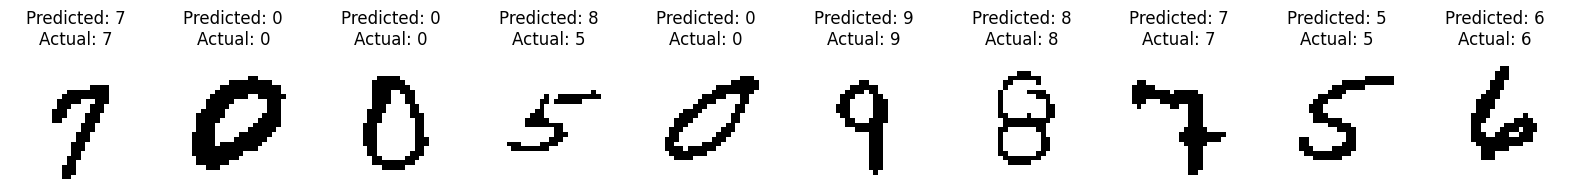

In [15]:
### Visualize the comparison between predicted and actual labels
import matplotlib.pyplot as plt

num_samples = 10 

fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))

for i in range(num_samples):
    ax = axes[i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    ax.set_title(f"Predicted: {y_pred[i]}\nActual: {y_test[i]}")
    ax.axis('off')

plt.show()
